# Aggregating benchmark runs

In [1]:
import pathlib
import typing

import numpy as np
import humanize
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from labm8 import pbutil
from labm8 import viz
from labm8 import labdate
from labm8 import labtypes
from labm8 import prof

from gpu.libcecl.proto import libcecl_pb2
from datasets.benchmarks.gpgpu import gpgpu_pb2

In [2]:
LOGDIR = pathlib.Path('/var/phd/shared/datasets/benchmarks/gpgpu/logs')
assert LOGDIR.is_dir()
!echo $(ls {LOGDIR} | wc -l) files

441 files


In [3]:
def KernelInvocationToRow(log: gpgpu_pb2.GpgpuBenchmarkRun, ki: libcecl_pb2.OpenClKernelInvocation):
    return {
        'date': labdate.DatetimeFromMillisecondsTimestamp(log.run.ms_since_unix_epoch),
        'suite': log.benchmark_suite,
        'benchmark': log.benchmark_name,
        'dataset': log.dataset_name,
        'device': log.run.device.device_name,
        'kernel': ki.kernel_name,
        'global_size': ki.global_size,
        'local_size': ki.local_size,
        'runtime_ms': ki.runtime_ms,
        'transferred_bytes': ki.transferred_bytes,
    }

def LogsToTable(logs: typing.Iterator[gpgpu_pb2.GpgpuBenchmarkRun]):
    rows = []
    for log in logs:
        rows += [KernelInvocationToRow(log, ki) for ki in log.run.kernel_invocation]
    return pd.DataFrame(rows, columns=[
        'date',
        'suite',
        'benchmark',
        'dataset',
        'device',
        'kernel',
        'global_size',
        'local_size',
        'runtime_ms',
        'transferred_bytes',
    ])

with prof.ProfileToStdout():
    df = LogsToTable(pbutil.FromFile(log, gpgpu_pb2.GpgpuBenchmarkRun())
                     for log in LOGDIR.iterdir())
df

completed in 9.873 seconds (started 9 seconds ago)


,date,suite,benchmark,dataset,device,kernel,global_size,local_size,runtime_ms,transferred_bytes
0,2019-03-01 19:42:24.426,amd-app-sdk-3.0,BinomialOption,default,Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz,binomial_options,16320,255,5.451952,2048
1,2019-03-01 19:54:47.799,npb-3.3,is.W,W,GeForce GTX 1080,create_seq,16384,64,0.707840,8930368
2,2019-03-01 19:54:47.799,npb-3.3,is.W,W,GeForce GTX 1080,rank0,1,1,0.038304,8930368
3,2019-03-01 19:54:47.799,npb-3.3,is.W,W,GeForce GTX 1080,rank1,65536,256,0.037504,8930368
4,2019-03-01 19:54:47.799,npb-3.3,is.W,W,GeForce GTX 1080,rank2,1048576,256,0.082336,8930368
5,2019-03-01 19:54:47.799,npb-3.3,is.W,W,GeForce GTX 1080,rank3_0,65536,256,0.039200,8930368
6,2019-03-01 19:54:47.799,npb-3.3,is.W,W,GeForce GTX 1080,rank3_1,256,256,0.051360,8930368
7,2019-03-01 19:54:47.799,npb-3.3,is.W,W,GeForce GTX 1080,rank3_2,65536,256,0.036160,8930368
8,2019-03-01 19:54:47.799,npb-3.3,is.W,W,GeForce GTX 1080,rank4,1,1,0.035424,8930368
9,2019-03-01 19:54:47.799,npb-3.3,is.W,W,GeForce GTX 1080,rank0,1,1,0.036640,8930368


## How many unique kernel invocations are there?

Where a unique kernel invocation is a unique combination of <suite,benchmark,kernel,dataset>.

In [4]:
summary = df.groupby(['suite', 'benchmark', 'kernel', 'dataset']).count()\
    .rename(columns={'date': 'invocation_count'})[['invocation_count']]
print(len(summary), 'unique kernel invocations across all devices,', humanize.intcomma(sum(summary['invocation_count'])), 'total')
summary

782 unique kernel invocations across all devices, 1,357,764 total


invocation_count
suite           benchmark            kernel                          dataset                  
amd-app-sdk-3.0 AdvancedConvolution  advancedNonSeparableConvolution default                 1
                                     advancedSeparableConvolution    default                 1
                BinomialOption       binomial_options                default                 4
                BitonicSort          bitonicSort                     default               480
                BlackScholes         blackScholes                    default                 4
                FastWalshTransform   fastWalshTransform              default                40
                FloydWarshall        floydWarshallPass               default              1024
                Histogram            histogram256_scalar             default                 1
                MatrixMultiplication mmmKernel                       default                 4
                MatrixTranspose      matrixTranspose                 default                 4
                MonteCarloAsian      calPriceVega_Scalar             default                40
                PrefixSum            group_prefixSum                 default                 4
                Reduction            reduce                          default                 4
                ScanLargeArrays      ScanLargeArrays                 default                 4
                                     blockAddition                   default                 4
                                     prefixSum                       default                 4
                SimpleConvolution    simpleNonSeparableConvolution   default                 4
                                     simpleSeparableConvolutionPass1 default                 4
                                     simpleSeparableConvolutionPass2 default                 4
                SobelFilter          sobel_filter                    default                 4
npb-3.3         bt.A                 add                             A                     402
                                     compute_rhs1                    A                     404
                                     compute_rhs2                    A                     404
                                     compute_rhs3                    A                     404
                                     compute_rhs4                    A                     404
                                     compute_rhs5                    A                     404
                                     compute_rhs6                    A                     404
                                     error_norm                      A                       2
                                     exact_rhs1                      A                       2
                                     exact_rhs2                      A                       2
...                                                                                        ...
shoc-1.1.5      S3D                  ratt6_kernel                    default                40
                                     ratt7_kernel                    default                40
                                     ratt8_kernel                    default                40
                                     ratt9_kernel                    default                40
                                     ratt_kernel                     default                40
                                     ratx2_kernel                    default                40
                                     ratx4_kernel                    default                40
                                     ratx_kernel                     default                40
                                     ratxb_kernel                    default                40
                                     rdsmh_kernel                    default            

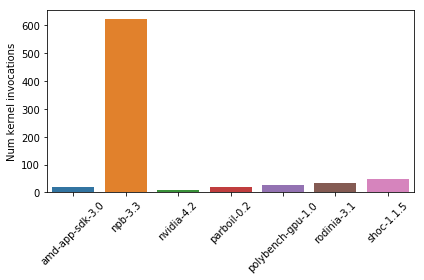

,# kernel invocations
suite,
amd-app-sdk-3.0,20
npb-3.3,624
nvidia-4.2,9
parboil-0.2,20
polybench-gpu-1.0,27
rodinia-3.1,34
shoc-1.1.5,48


In [20]:
# 
summary = df.groupby(['suite', 'benchmark', 'kernel', 'dataset'])\
    .mean().groupby(['suite']).count().reset_index()
sns.barplot(x='suite', y='global_size', 
            data=summary)
plt.ylabel('Num kernel invocations')
viz.RotateXLabels(45)
plt.xlabel('')
viz.Finalize()
df.groupby(['suite', 'benchmark', 'kernel', 'dataset'])\
    .mean().groupby(['suite']).count()\
    .rename(columns={'global_size': '# kernel invocations'})[['# kernel invocations',]]

In [31]:
df.groupby(['suite', 'benchmark', 'kernel']).mean().groupby(['suite']).count()

,global_size,local_size,runtime_ms,transferred_bytes
suite,,,,
amd-app-sdk-3.0,20,20,20,20
npb-3.3,624,624,624,624
nvidia-4.2,9,9,9,9
parboil-0.2,20,20,20,20
polybench-gpu-1.0,27,27,27,27
rodinia-3.1,34,34,34,34
shoc-1.1.5,48,48,48,48


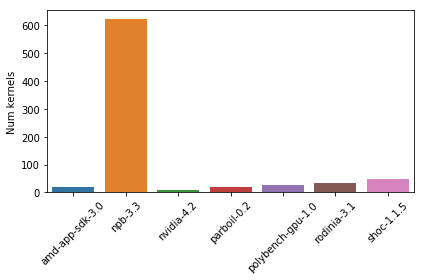

,# kernels
suite,
amd-app-sdk-3.0,20
npb-3.3,624
nvidia-4.2,9
parboil-0.2,20
polybench-gpu-1.0,27
rodinia-3.1,34
shoc-1.1.5,48


In [21]:
summary = df.groupby(['suite', 'benchmark', 'kernel'])\
    .mean().groupby(['suite']).count().reset_index()
sns.barplot(x='suite', y='global_size', 
            data=summary)
plt.ylabel('Num kernels')
viz.RotateXLabels(45)
plt.xlabel('')
viz.Finalize()
df.groupby(['suite', 'benchmark', 'kernel'])\
    .mean().groupby(['suite']).count()\
    .rename(columns={'global_size': '# kernels'})[['# kernels',]]

### Num distinct benchmarks

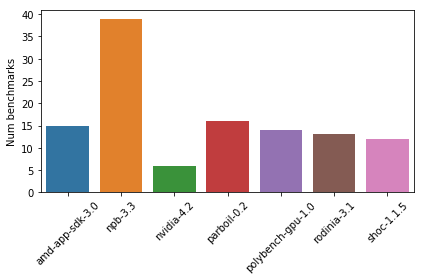

,# benchmarks
suite,
amd-app-sdk-3.0,15
npb-3.3,39
nvidia-4.2,6
parboil-0.2,16
polybench-gpu-1.0,14
rodinia-3.1,13
shoc-1.1.5,12


In [18]:
summary = df.groupby(['suite', 'benchmark'])\
    .mean().groupby(['suite']).count().reset_index()
sns.barplot(x='suite', y='global_size', 
            data=summary)
plt.ylabel('Num benchmarks')
viz.RotateXLabels(45)
plt.xlabel('')
viz.Finalize()
df.groupby(['suite', 'benchmark'])\
    .mean().groupby(['suite']).count()\
    .rename(columns={'global_size': '# benchmarks'})[['# benchmarks',]]

## Sanity check values

In [6]:
# Sanity check that features are the same across runs.
# TODO(cec): Do we care about global and local sizes being consistent?

def ColumnIsConstantAcrossRuns(df, col):
    """Check that column is consistent across all runs from all devices."""
    mins = df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'global_size', 'local_size']).min()[col]
    maxs = df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'global_size', 'local_size']).max()[col]
    mean = (mins == maxs).mean()
    if mean != 1:
        print(f'{mean:.1%} of {col} values are constant')
    return mean == 1

assert ColumnIsConstantAcrossRuns(df, 'transferred_bytes')

## Aggregations

In [7]:
# Aggregate
df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'device']).mean()

global_size  \
suite           benchmark            kernel                          dataset device                                                   
amd-app-sdk-3.0 AdvancedConvolution  advancedNonSeparableConvolution default Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz  262144.0000   
                                     advancedSeparableConvolution    default Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz  262144.0000   
                BinomialOption       binomial_options                default GeForce GTX 1080                            16320.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz   16320.0000   
                BitonicSort          bitonicSort                     default GeForce GTX 1080                            16384.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz   16384.0000   
                BlackScholes         blackScholes                    default GeForce GTX 1080                            65536.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz   65536.0000   
                FastWalshTransform   fastWalshTransform              default GeForce GTX 1080                              512.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz     512.0000   
                FloydWarshall        floydWarshallPass               default GeForce GTX 1080                            65536.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz   65536.0000   
                Histogram            histogram256_scalar             default Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz    8192.0000   
                MatrixMultiplication mmmKernel                       default GeForce GTX 1080                              256.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz     256.0000   
                MatrixTranspose      matrixTranspose                 default GeForce GTX 1080                              256.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz     256.0000   
                MonteCarloAsian      calPriceVega_Scalar             default GeForce GTX 1080                           524288.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz  524288.0000   
                PrefixSum            group_prefixSum                 default GeForce GTX 1080                             1024.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz    4096.0000   
                Reduction            reduce                          default GeForce GTX 1080                              256.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz     256.0000   
                ScanLargeArrays      ScanLargeArrays                 default GeForce GTX 1080                            16384.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz   16384.0000   
                                     blockAddition                   default GeForce GTX 1080                            32768.0000   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz   32768.0000   
                                     prefixSum                       default GeForce GTX 1080                               64.0000   
                                                                      

In [8]:
# Averages (only the runtime_ms field is averaged, everything else is constant)
df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'device', 'global_size', 'local_size']).mean()

runtime_ms  \
suite           benchmark            kernel                          dataset device                                    global_size local_size               
amd-app-sdk-3.0 AdvancedConvolution  advancedNonSeparableConvolution default Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 262144      256          22.482769   
                                     advancedSeparableConvolution    default Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 262144      256           6.682854   
                BinomialOption       binomial_options                default GeForce GTX 1080                          16320       255           0.084928   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 16320       255           5.451952   
                BitonicSort          bitonicSort                     default GeForce GTX 1080                          16384       256           0.022277   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 16384       256           0.127987   
                BlackScholes         blackScholes                    default GeForce GTX 1080                          65536       256           0.310368   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 65536       256           1.227159   
                FastWalshTransform   fastWalshTransform              default GeForce GTX 1080                          512         256           0.040980   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 512         256           0.096185   
                FloydWarshall        floydWarshallPass               default GeForce GTX 1080                          65536       256           0.139156   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 65536       256           0.995102   
                Histogram            histogram256_scalar             default Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 8192        128           1.100077   
                MatrixMultiplication mmmKernel                       default GeForce GTX 1080                          256         64            0.060277   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 256         64            0.123392   
                MatrixTranspose      matrixTranspose                 default GeForce GTX 1080                          256         256           0.040437   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 256         256           0.070033   
                MonteCarloAsian      calPriceVega_Scalar             default GeForce GTX 1080                          524288      256           1.471141   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 524288      256          18.097545   
                PrefixSum            group_prefixSum                 default GeForce GTX 1080                          1024        1024          0.032853   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 4096        4096          0.334030   
                Reduction            reduce                          default GeForce GTX 1080                          256         256           0.043883   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 256         256           0.128143   
                ScanLargeArrays      ScanLargeArrays                 default GeForce GTX 1080                          16384       128           0.022827   
                                                             

## Feature / runtime values

n=1357764, mean=14.68, stdev=113.61, percentiles=[0%=0.01 50%=0.15 95%=22.08 99%=463.20 100%=7145.10]


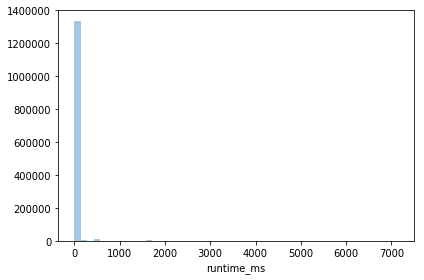

In [9]:
print(viz.SummarizeFloats(df.runtime_ms))
sns.distplot(df.runtime_ms, kde=False)
viz.Finalize()

n=782, mean=1736.27, stdev=15322.15, percentiles=[0%=1 50%=12 95%=804 99%=46049 100%=239956]


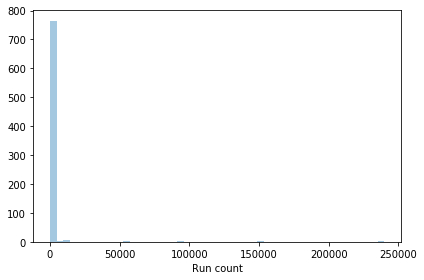

In [10]:
num_runs = df.groupby(['suite', 'benchmark', 'kernel', 'dataset']).count()['runtime_ms']
print(viz.SummarizeInts(num_runs))
sns.distplot(num_runs, kde=False)
plt.xlabel('Run count')
viz.Finalize()